# Laboratory 24: K-Nearest Neighbors (KNN) Algorithm


## Full name: 
## R#: 
## HEX: 
## Title of the notebook
## Date: 

![](https://memegenerator.net/img/instances/63959638.jpg) <br>


### The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption. <br>


## Theory

![](https://geohealthinnovations.org/wp-content/uploads/2013/01/toblerquote.png) <br>

### The First Law of Geography, according to Waldo Tobler, is "everything is related to everything else, but near things are more related than distant things." The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.


![](https://miro.medium.com/max/1576/1*vAtQZbROuTdp36aQQ8cqBA.png)

    distance measures play an important role in machine learning. Perhaps four of the most commonly used distance measures in machine learning are as follows:

    
        
    - Euclidean Distance:
    
        Calculates the distance between two real-valued vectors. Although there are other possible choices, most instance-based learners use Euclidean distance.
        
    - Manhattan Distance:
    
        Also called the Taxicab distance or the City Block distance, calculates the distance between two real-valued vectors. It is perhaps more useful to vectors that describe objects on a uniform grid, like a chessboard or city blocks. The taxicab name for the measure refers to the intuition for what the measure calculates: the shortest path that a taxicab would take between city blocks (coordinates on the grid).
        
    - Minkowski Distance:
    
        Calculates the distance between two real-valued vectors. It is a generalization of the Euclidean and Manhattan distance measures and adds a parameter, called the “order” or “p“, that allows different distance measures to be calculated. When p is set to 1, the calculation is the same as the Manhattan distance. When p is set to 2, it is the same as the Euclidean distance.

![](https://lh3.googleusercontent.com/proxy/m15tJr3Lk4dFboz18Uv-sdQbakZ9w2CmUA2S1MTXkys5Axnm6hFjhMnNaaLa5EpG_4SfTjS74T71m_LpsYPj6DPnZEiktIE)

### Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.

![](https://s3.amazonaws.com/stackabuse/media/k-nearest-neighbors-algorithm-python-scikit-learn-1.png)

### Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.

![](https://s3.amazonaws.com/stackabuse/media/k-nearest-neighbors-algorithm-python-scikit-learn-2.png)


### The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

![](https://miro.medium.com/max/1080/0*49s1xDlDKDsn55xa.gif)


## Why KNN?

- It is extremely easy to implement
- It is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
- Since the algorithm requires no training before making predictions, new data can be added seamlessly.
- There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

![](https://miro.medium.com/max/1022/1*AuXDgGrr0wbCoF6KDXXSZQ.jpeg)

<hr>
<hr>

## Example 1: Iris Plants Classification <br>

![](https://i.etsystatic.com/10589108/r/il/213b38/1876572420/il_570xN.1876572420_ikcm.jpg) <br>



### This is perhaps the best known problem and database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day. The Iris Flower Dataset involves predicting the flower species given measurements of iris flowers. The Iris Data Set contains information on sepal length, sepal width, petal length, petal width all in cm, and class of iris plants. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. Hence, it is a multiclass classification problem and the number of observations for each class is balanced.

![](https://miro.medium.com/max/1000/1*lFC_U5j_Y8IXF4Ga87KNVg.png) <br>


### Let's use a KNN model in Python and see if we can classifity iris plants based on the four given predictors.



<hr>

*__Acknowledgements__*
1. *Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).*
2. *Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis. (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.*
3. *Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System Structure and Classification Rule for Recognition in Partially Exposed Environments".  IEEE Transactions on Pattern Analysis and Machine Intelligence, Vol. PAMI-2, No. 1, 67-71.*
4. *Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions on Information Theory, May 1972, 431-433.*      
5. *See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II conceptual clustering system finds 3 classes in the data.*

### As you know by now, the first step is to load some necessary libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline

### Then, we should read the dataset and explore it using tools such as descriptive statistics:

In [2]:
# This is something cool that you can do on your local machine (Jupyter) and not on CoCalc.

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset = pd.read_csv('iris.csv')
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### We should seperate the predictors and target - similar to what we did for logisitc regression:

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

### Then, the dataset should be split into training and testing. This way our algorithm is tested on un-seen data, as it would be in a real-world application. Let's go with a 80/20 split:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#This means that out of total 150 records:
#the training set will contain 120 records & 
#the test set contains 30 of those records.

### It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn. The first step is to import the "KNeighborsClassifier" class from the "sklearn.neighbors" library. In the second line, this class is initialized with one parameter, i.e. "n_neigbours". This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### The final step is to make predictions on our test data. To do so, execute the following script:

In [8]:
y_pred = classifier.predict(X_test)

### As it's time to evaluate our model, we will go to our rather new friends, confusion matrix, precision, recall and f1 score as the most commonly used discrete GOF metrics.

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0  8  1]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



## What if we had used a different value for K? What is the best value for K?

### One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset. In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 50. To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 50:

In [10]:
error = []

# Calculating error for K values between 1 and 50
# In each iteration the mean error for predicted values of test set is calculated and
# the result is appended to the error list.
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

### The next step is to plot the error values against K values:

Text(0, 0.5, 'Mean Error')

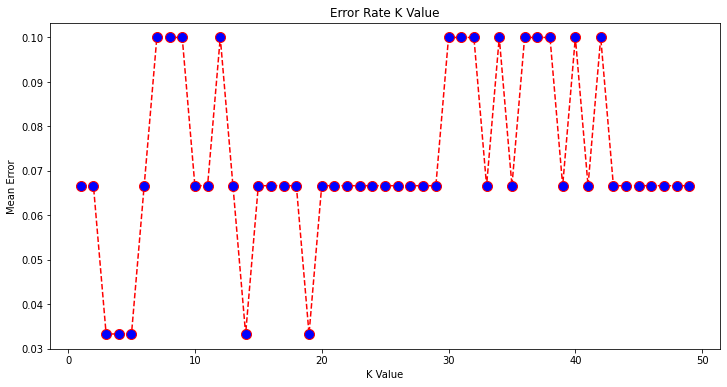

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### From the output we can see that the mean error is zero when the value of the K is between ____! Interesting plot!

<hr>
<hr>

### Final remarks ...

- **KNN is a simple yet powerful classification algorithm.**
- **It requires no training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm.**
- **The KNN algorithm have been widely used to find document similarity and pattern recognition.**


![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>

*This notebook was inspired by several blogposts including:* 

- __"K-Nearest Neighbors Algorithm in Python and Scikit-Learn"__ by __Scott Robinson__ available at* https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/ <br>
- __"Develop k-Nearest Neighbors in Python From Scratch"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ <br>
- __"4 Distance Measures for Machine Learning"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/distance-measures-for-machine-learning/ <br>
- __"KNN Classification using Scikit-learn"__ by __Avinash Navlani__  available at* https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn <br>


*Here are some great reads on these topics:* 
- __"KNN in Python"__ by __Czako Zoltan__ available at* https://towardsdatascience.com/knn-in-python-835643e2fb53 <br>
- __"K Nearest Neighbor Algorithm In Python"__ by __Cory Maklin__ available at* https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55 <br>
- __"k-nearest neighbor algorithm in Python"__ available at* https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/ <br>

*Here are some great videos on these topics:* 
- __"StatQuest: K-nearest neighbors, Clearly Explained"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=HVXime0nQeI <br>
- __"How kNN algorithm works"__ by __Thales Sehn Körting__ available at* https://www.youtube.com/watch?v=UqYde-LULfs <br>
- __"KNN Algorithm Using Python | How KNN Algorithm Works | Data Science For Beginners | Simplilearn"__ by __Simplilearn__ available at* https://www.youtube.com/watch?v=4HKqjENq9OU <br>

## Bonus Exercise: Obesity Level Estimation <br>

![](https://ars.els-cdn.com/content/image/1-s2.0-S2405457717303698-gr1.jpg) <br>



### The "ObesityDataSet.csv" dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 

|Columns|Info.|
|---:|---:|
|Gender |Binary set of 0:"Male" and 1:"Female"|
|Age | Age of the respondent|
|Height |Height of the respondent (m)|
|Weight |Weight of the respondent (kg)|
|family_history_with_overweight |Binary set of 1:"yes" and 0:"no"|
|FAVC |Frequent consumption of high caloric food- Binary set of 1:"yes" and 0:"no"|
|FCVC |Frequency of consumption of vegetables- never:1/ sometimes:2/ always:3| 
|NCP |Number of main meals|
|CAEC |Consumption of food between meals- 0:no/ 1:sometimes/ 2:frequently/ 3:always|
|SMOKE |Smoking status of the respondent- Binary set of 1:"yes" and 0:"no"|
|CH20 |Consumption of water daily- Less than a liter:1/ Between 1 and 2 liters:2/ more than 2 liters:3|
|SCC |Calories consumption monitoring- Binary set of 1:"yes" and 0:"no"| 
|FAF |Physical activity frequency- never:0/ 1or2 days:1/ 2to4 days:2/ 4to5dats:3|
|TUE |Time using technology devices- 0-2 hours:1/ 3-5 hours:2/ more than 5 hours:3|
|CALC |Consumption of alcohol- 0:no/ 1:sometimes/ 2:frequently/ 3:always|
|MTRANS |Transportation used- 0: Automobile/ 1: bike/ 2: motorbike/ 3: public transportation/ 4: walking |
|NObeyesdad |Obesity Level- 0:Insufficient Weight/ 1:Normal Weight/ 2: Overweight Level I/ 3: Overweight Level II/ 4: Obesity Type I/ 5: Obesity Type II/ 6: Obesity Type III|

### Follow the steps below and answer the associated questions:


#### Step1: Read the dataset, explore it, and describe it in your own words.

#### Step2: Use the logisitc regression algorithm and create a classifier with all the predictors to estimate the level of obesity. Use a 75/25 split for training and tesing. Utilize appropriate assessment metrics and provide a report on the performance of your classifier. 

#### Step3: Use the KNN algorithm and create a classifier with all the predictors to estimate the level of obesity. Use a 75/25 split for training and tesing. Utilize appropriate assessment metrics and provide a report on the performance of your classifier. Plot the mean error for the predicted values of test set for all the K values between 1 and 100. 

#### Step4: Compare the performance of the two classifers and discuss the pros and cons of each one. Which classifier would you recommend, and why? 

<hr>

*__Source__* <br>
1. *Fabio Mendoza Palechor, Email: fmendoza1 '@' cuc.edu.co, Celphone: +573182929611*
2. *Alexis de la Hoz Manotas, Email: akdelahoz '@' gmail.com, Celphone: +573017756983*

*__Citation__* <br>
*Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.*

![](https://6elrmjmsbs335jwbeybarrry-wpengine.netdna-ssl.com/wp-content/uploads/2019/08/08-Fall-GIFs-Thanksgiving2.gif)